In [229]:
import matplotlib.pyplot as plt
import numpy as np
import os 
from datetime import datetime
import pandas as pd
import plotly.express as px



In [230]:
df = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv')
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [231]:
df.isnull().sum()

timestamp    0
value        0
dtype: int64

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.4+ KB


In [233]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [234]:
df=df.set_index('timestamp').resample('H').mean()

In [235]:
df

,value
timestamp,
2014-07-01 00:00:00,9485.5
2014-07-01 01:00:00,5433.0
2014-07-01 02:00:00,3346.5
2014-07-01 03:00:00,2216.5
2014-07-01 04:00:00,2189.5
...,...
2015-01-31 19:00:00,28288.5
2015-01-31 20:00:00,24138.0
2015-01-31 21:00:00,24194.5


<AxesSubplot:xlabel='timestamp'>

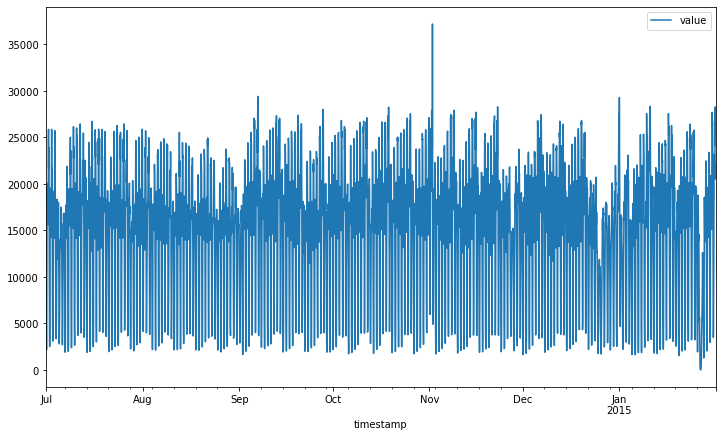

In [236]:
df.plot(figsize=(12,7))

In [237]:
df.head()

,value
timestamp,
2014-07-01 00:00:00,9485.5
2014-07-01 01:00:00,5433.0
2014-07-01 02:00:00,3346.5
2014-07-01 03:00:00,2216.5
2014-07-01 04:00:00,2189.5


In [238]:
df.tail()

,value
timestamp,
2015-01-31 19:00:00,28288.5
2015-01-31 20:00:00,24138.0
2015-01-31 21:00:00,24194.5
2015-01-31 22:00:00,26515.0
2015-01-31 23:00:00,26439.5


In [239]:
plotly_docs = 'https://plotly.com/python/time-series/' #refer this for more information
fig = px.line(df.reset_index(), x='timestamp', y='value', title='Taxi Demand')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [240]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: holidays>=0.14.2 in c:\users\91986\anaconda3\lib\site-packages (from prophet) (0.18)



In [241]:
import prophet

In [242]:
df

,value
timestamp,
2014-07-01 00:00:00,9485.5
2014-07-01 01:00:00,5433.0
2014-07-01 02:00:00,3346.5
2014-07-01 03:00:00,2216.5
2014-07-01 04:00:00,2189.5
...,...
2015-01-31 19:00:00,28288.5
2015-01-31 20:00:00,24138.0
2015-01-31 21:00:00,24194.5


In [243]:
df1=df.reset_index()[['timestamp','value']].rename({'timestamp':'ds','value':'y'},axis='columns')

In [244]:
df1

,ds,y
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [245]:
train_data = df1[(df1['ds']>='2014-07-01') & (df1['ds']<='2014-12-01')]
test_data = df1[(df1['ds']>'2014-12-01')]

In [246]:
train_data.shape

(3673, 2)

In [247]:
test_data.shape

(1487, 2)

In [248]:
train_data

,ds,y
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5
...,...,...
3668,2014-11-30 20:00:00,15517.5
3669,2014-11-30 21:00:00,13952.0
3670,2014-11-30 22:00:00,12916.5
3671,2014-11-30 23:00:00,9437.0


In [249]:
test_data

,ds,y
3673,2014-12-01 01:00:00,3570.0
3674,2014-12-01 02:00:00,2412.0
3675,2014-12-01 03:00:00,1643.5
3676,2014-12-01 04:00:00,2027.5
3677,2014-12-01 05:00:00,3748.0
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [250]:
!pip install pystan==2.19.1.1 
#python -m pip install prophet


In [251]:
from prophet import Prophet

In [252]:
model = Prophet(changepoint_range=0.95)
model.fit(train_data)

17:30:06 - cmdstanpy - INFO - Chain [1] start processing
17:30:06 - cmdstanpy - INFO - Chain [1] done processing


In [253]:
future = model.make_future_dataframe(periods=1487,freq='H')
future.tail(100)

,ds
5060,2015-01-27 20:00:00
5061,2015-01-27 21:00:00
5062,2015-01-27 22:00:00
5063,2015-01-27 23:00:00
5064,2015-01-28 00:00:00
...,...
5155,2015-01-31 19:00:00
5156,2015-01-31 20:00:00
5157,2015-01-31 21:00:00
5158,2015-01-31 22:00:00


In [254]:
forecast_df = model.predict(future)
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-07-01 00:00:00,14239.761943,8444.011868,17228.662026,14239.761943,14239.761943,-1167.855430,-1167.855430,-1167.855430,56.614088,56.614088,56.614088,-1224.469517,-1224.469517,-1224.469517,0.0,0.0,0.0,13071.906514
1,2014-07-01 01:00:00,14241.820988,5660.963956,14363.254261,14241.820988,14241.820988,-4301.471457,-4301.471457,-4301.471457,-3179.929565,-3179.929565,-3179.929565,-1121.541892,-1121.541892,-1121.541892,0.0,0.0,0.0,9940.349530
2,2014-07-01 02:00:00,14243.880032,1561.705784,10394.525434,14243.880032,14243.880032,-7985.131056,-7985.131056,-7985.131056,-6962.394983,-6962.394983,-6962.394983,-1022.736072,-1022.736072,-1022.736072,0.0,0.0,0.0,6258.748976
3,2014-07-01 03:00:00,14245.939076,-1277.862985,7628.943341,14245.939076,14245.939076,-11278.081927,-11278.081927,-11278.081927,-10349.416816,-10349.416816,-10349.416816,-928.665111,-928.665111,-928.665111,0.0,0.0,0.0,2967.857149
4,2014-07-01 04:00:00,14247.998120,-2767.366180,5796.684779,14247.998120,14247.998120,-12704.448272,-12704.448272,-12704.448272,-11864.590258,-11864.590258,-11864.590258,-839.858014,-839.858014,-839.858014,0.0,0.0,0.0,1543.549849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,6586.105352,11203.173424,21296.311637,4405.000161,8775.068938,9470.731244,9470.731244,9470.731244,7451.989850,7451.989850,7451.989850,2018.741393,2018.741393,2018.741393,0.0,0.0,0.0,16056.836596
5156,2015-01-31 20:00:00,6581.181820,11680.247170,21659.794423,4397.545197,8772.272167,10125.056989,10125.056989,10125.056989,8212.027309,8212.027309,8212.027309,1913.029680,1913.029680,1913.029680,0.0,0.0,0.0,16706.238809
5157,2015-01-31 21:00:00,6576.258289,10423.139203,20758.423828,4389.477349,8769.475397,9041.145494,9041.145494,9041.145494,7246.226860,7246.226860,7246.226860,1794.918635,1794.918635,1794.918635,0.0,0.0,0.0,15617.403783
5158,2015-01-31 22:00:00,6571.334757,8317.023684,18313.221330,4381.409501,8766.625419,6838.861426,6838.861426,6838.861426,5173.968851,5173.968851,5173.968851,1664.892575,1664.892575,1664.892575,0.0,0.0,0.0,13410.196183


In [255]:
df1.set_index('ds')[['y']]

,y
ds,
2014-07-01 00:00:00,9485.5
2014-07-01 01:00:00,5433.0
2014-07-01 02:00:00,3346.5
2014-07-01 03:00:00,2216.5
2014-07-01 04:00:00,2189.5
...,...
2015-01-31 19:00:00,28288.5
2015-01-31 20:00:00,24138.0
2015-01-31 21:00:00,24194.5


In [256]:
forecast_df.set_index('ds')[['yhat','yhat_lower','yhat_upper']]

,yhat,yhat_lower,yhat_upper
ds,,,
2014-07-01 00:00:00,13071.906514,8444.011868,17228.662026
2014-07-01 01:00:00,9940.349530,5660.963956,14363.254261
2014-07-01 02:00:00,6258.748976,1561.705784,10394.525434
2014-07-01 03:00:00,2967.857149,-1277.862985,7628.943341
2014-07-01 04:00:00,1543.549849,-2767.366180,5796.684779
...,...,...,...
2015-01-31 19:00:00,16056.836596,11203.173424,21296.311637
2015-01-31 20:00:00,16706.238809,11680.247170,21659.794423
2015-01-31 21:00:00,15617.403783,10423.139203,20758.423828


In [257]:
results = pd.concat([df1.set_index('ds')[['y']],forecast_df.set_index('ds')[['yhat','yhat_lower','yhat_upper']]],axis=1)

In [258]:
results

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2014-07-01 00:00:00,9485.5,13071.906514,8444.011868,17228.662026
2014-07-01 01:00:00,5433.0,9940.349530,5660.963956,14363.254261
2014-07-01 02:00:00,3346.5,6258.748976,1561.705784,10394.525434
2014-07-01 03:00:00,2216.5,2967.857149,-1277.862985,7628.943341
2014-07-01 04:00:00,2189.5,1543.549849,-2767.366180,5796.684779
...,...,...,...,...
2015-01-31 19:00:00,28288.5,16056.836596,11203.173424,21296.311637
2015-01-31 20:00:00,24138.0,16706.238809,11680.247170,21659.794423
2015-01-31 21:00:00,24194.5,15617.403783,10423.139203,20758.423828


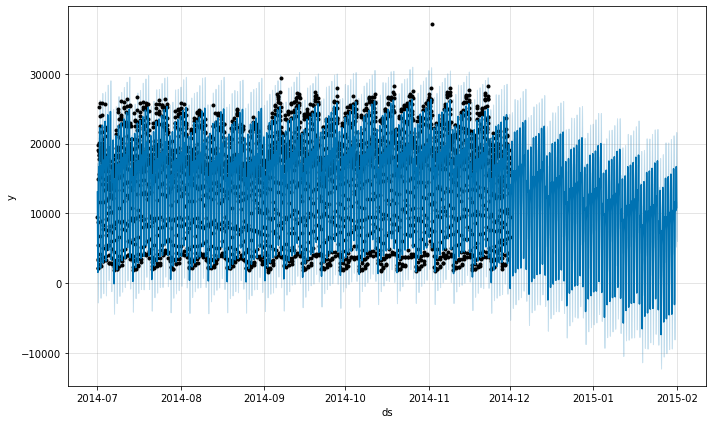

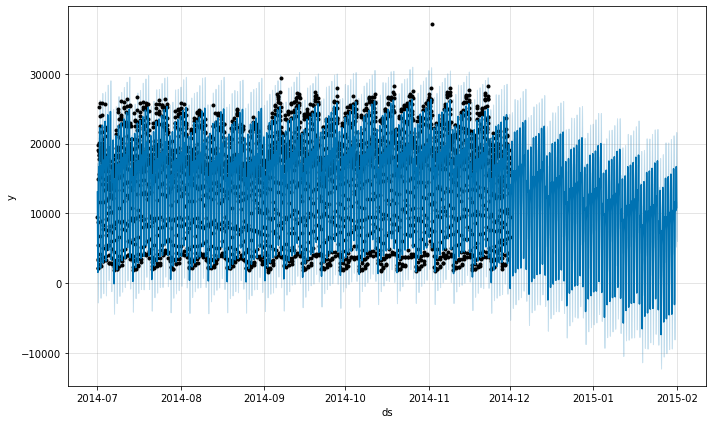

In [259]:
model.plot(forecast_df)

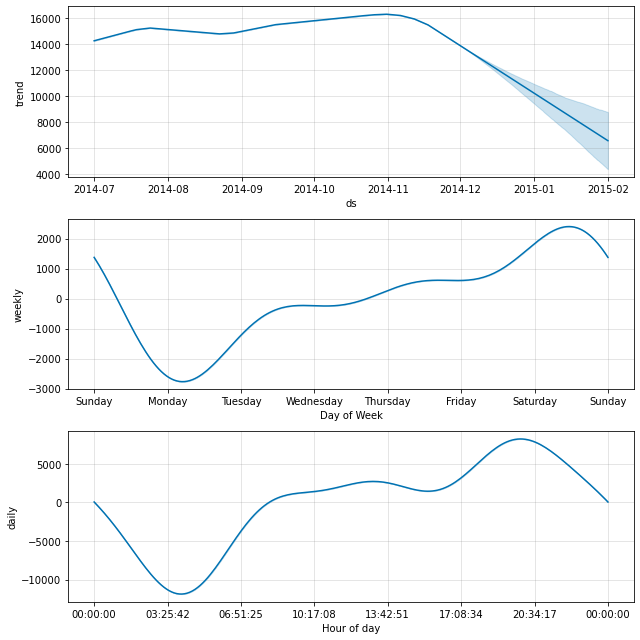

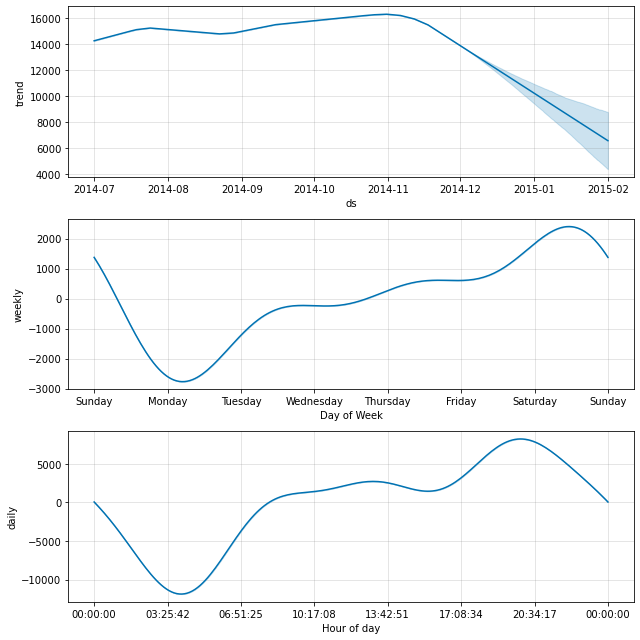

In [260]:
model.plot_components(forecast_df)

In [261]:
results['error']= results['y']-results['yhat']

In [262]:
results

,y,yhat,yhat_lower,yhat_upper,error
ds,,,,,
2014-07-01 00:00:00,9485.5,13071.906514,8444.011868,17228.662026,-3586.406514
2014-07-01 01:00:00,5433.0,9940.349530,5660.963956,14363.254261,-4507.349530
2014-07-01 02:00:00,3346.5,6258.748976,1561.705784,10394.525434,-2912.248976
2014-07-01 03:00:00,2216.5,2967.857149,-1277.862985,7628.943341,-751.357149
2014-07-01 04:00:00,2189.5,1543.549849,-2767.366180,5796.684779,645.950151
...,...,...,...,...,...
2015-01-31 19:00:00,28288.5,16056.836596,11203.173424,21296.311637,12231.663404
2015-01-31 20:00:00,24138.0,16706.238809,11680.247170,21659.794423,7431.761191
2015-01-31 21:00:00,24194.5,15617.403783,10423.139203,20758.423828,8577.096217


In [263]:
results['uncertianity']= results['yhat_upper']-results['yhat_lower']

In [264]:
results

,y,yhat,yhat_lower,yhat_upper,error,uncertianity
ds,,,,,,
2014-07-01 00:00:00,9485.5,13071.906514,8444.011868,17228.662026,-3586.406514,8784.650158
2014-07-01 01:00:00,5433.0,9940.349530,5660.963956,14363.254261,-4507.349530,8702.290304
2014-07-01 02:00:00,3346.5,6258.748976,1561.705784,10394.525434,-2912.248976,8832.819650
2014-07-01 03:00:00,2216.5,2967.857149,-1277.862985,7628.943341,-751.357149,8906.806327
2014-07-01 04:00:00,2189.5,1543.549849,-2767.366180,5796.684779,645.950151,8564.050959
...,...,...,...,...,...,...
2015-01-31 19:00:00,28288.5,16056.836596,11203.173424,21296.311637,12231.663404,10093.138214
2015-01-31 20:00:00,24138.0,16706.238809,11680.247170,21659.794423,7431.761191,9979.547254
2015-01-31 21:00:00,24194.5,15617.403783,10423.139203,20758.423828,8577.096217,10335.284625


In [265]:
results[results['error'].abs() > 1.5*results['uncertianity']]

,y,yhat,yhat_lower,yhat_upper,error,uncertianity
ds,,,,,,
2014-11-02 01:00:00,37204.5,14283.505261,10067.485832,18884.787033,22920.994739,8817.301201
2014-12-14 02:00:00,19950.0,6418.456576,2087.606856,10859.561229,13531.543424,8771.954373
2015-01-01 00:00:00,25850.0,10546.638868,6560.047988,15258.707871,15303.361132,8698.659882
2015-01-01 01:00:00,29292.0,7344.163368,2606.921740,12052.226128,21947.836632,9445.304388
2015-01-01 02:00:00,25753.5,3594.475216,-726.639089,8282.363105,22159.024784,9009.002194
2015-01-01 03:00:00,22067.0,238.578329,-4244.968942,4739.904022,21828.421671,8984.872964
2015-01-01 04:00:00,15399.5,-1247.453017,-5916.986606,3291.301454,16646.953017,9208.288061
2015-01-10 23:00:00,28351.0,13302.710234,8682.051001,17599.455629,15048.289766,8917.404628
2015-01-11 00:00:00,25721.5,10471.149047,5980.855254,15050.052065,15250.350953,9069.196811


In [266]:
#Detecting the outliers in the dataset
l=[]
for i,j in zip(results['error'].abs() , 1.5*results['uncertianity']):
    if i>j:
        l.append('Outliers')
#         print('Outliers')
    
    else:
        l.append('Normal data')
#         print('Normal data')

In [267]:
results['anomaly']=l

In [268]:
results

,y,yhat,yhat_lower,yhat_upper,error,uncertianity,anomaly
ds,,,,,,,
2014-07-01 00:00:00,9485.5,13071.906514,8444.011868,17228.662026,-3586.406514,8784.650158,Normal data
2014-07-01 01:00:00,5433.0,9940.349530,5660.963956,14363.254261,-4507.349530,8702.290304,Normal data
2014-07-01 02:00:00,3346.5,6258.748976,1561.705784,10394.525434,-2912.248976,8832.819650,Normal data
2014-07-01 03:00:00,2216.5,2967.857149,-1277.862985,7628.943341,-751.357149,8906.806327,Normal data
2014-07-01 04:00:00,2189.5,1543.549849,-2767.366180,5796.684779,645.950151,8564.050959,Normal data
...,...,...,...,...,...,...,...
2015-01-31 19:00:00,28288.5,16056.836596,11203.173424,21296.311637,12231.663404,10093.138214,Normal data
2015-01-31 20:00:00,24138.0,16706.238809,11680.247170,21659.794423,7431.761191,9979.547254,Normal data
2015-01-31 21:00:00,24194.5,15617.403783,10423.139203,20758.423828,8577.096217,10335.284625,Normal data


In [269]:
#Outliers
results[results['anomaly']=='Outliers']

,y,yhat,yhat_lower,yhat_upper,error,uncertianity,anomaly
ds,,,,,,,
2014-11-02 01:00:00,37204.5,14283.505261,10067.485832,18884.787033,22920.994739,8817.301201,Outliers
2014-12-14 02:00:00,19950.0,6418.456576,2087.606856,10859.561229,13531.543424,8771.954373,Outliers
2015-01-01 00:00:00,25850.0,10546.638868,6560.047988,15258.707871,15303.361132,8698.659882,Outliers
2015-01-01 01:00:00,29292.0,7344.163368,2606.921740,12052.226128,21947.836632,9445.304388,Outliers
2015-01-01 02:00:00,25753.5,3594.475216,-726.639089,8282.363105,22159.024784,9009.002194,Outliers
2015-01-01 03:00:00,22067.0,238.578329,-4244.968942,4739.904022,21828.421671,8984.872964,Outliers
2015-01-01 04:00:00,15399.5,-1247.453017,-5916.986606,3291.301454,16646.953017,9208.288061,Outliers
2015-01-10 23:00:00,28351.0,13302.710234,8682.051001,17599.455629,15048.289766,8917.404628,Outliers
2015-01-11 00:00:00,25721.5,10471.149047,5980.855254,15050.052065,15250.350953,9069.196811,Outliers


In [272]:
plotly_docs = 'https://plotly.com/python/time-series/' #refer this for more information
fig = px.scatter(results.reset_index(), x='ds', y='y', title='Taxi Demand',color='anomaly')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

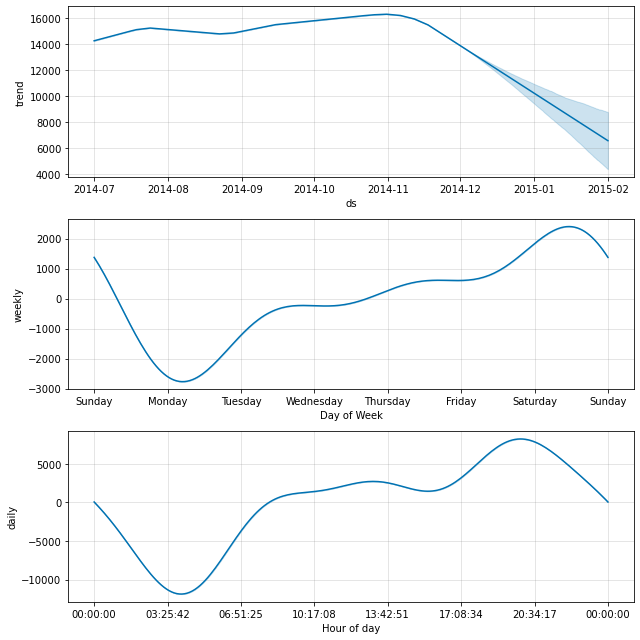

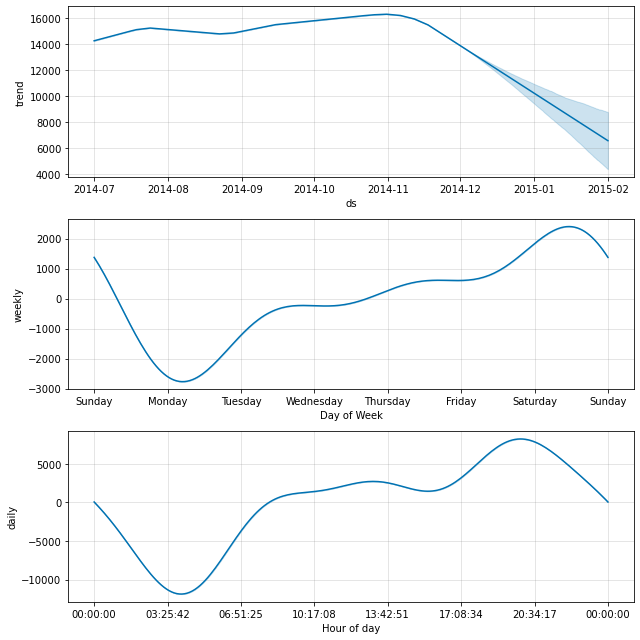

In [271]:
model.plot_components(forecast_df)